In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/nicogonzalez/Desktop/BABSON COLLEGE/Clasess/SPRING 2024/Advanced Programming /In Class 5 /homes.csv')
df.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [4]:
df.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


Dataset Description
Overview
The dataset contains information about 50 properties. Each row represents a property, and the columns provide details about the property's selling price (Sell), listed price ("List"), living space in square feet ("Living"), number of rooms ("Rooms"), number of bedrooms ("Beds"), number of bathrooms ("Baths"), age of the property ("Age"), land size in acres ("Acres"), and property taxes ("Taxes").

Summary Statistics
Selling Price (Sell):

Range: $87,000 to $567,000
Average (Mean): $170,360
Standard Deviation: $72,755.89
Listed Price ("List"):

Range: $90,000 to $625,000
Average (Mean): $178,340
Standard Deviation: $79,382.72
Living Space ("Living"):

Range: 10 sqft to 64 sqft
Average (Mean): 21.12 sqft
Standard Deviation: 8.35 sqft
Number of Rooms ("Rooms"):

Range: 5 to 12 rooms
Average (Mean): 8.06 rooms
Standard Deviation: 1.28 rooms
Number of Bedrooms ("Beds"):

Range: 3 to 6 bedrooms
Average (Mean): 3.82 bedrooms
Standard Deviation: 0.69 bedrooms
Number of Bathrooms ("Baths"):

Range: 1 to 4 bathrooms
Average (Mean): 1.86 bathrooms
Standard Deviation: 0.76 bathrooms
Age of Property ("Age"):

Range: 1 to 4 years
Average (Mean): 30.22 years
Standard Deviation: 30.96 years
Land Size ("Acres"):

Range: 0.22 acres to 6.49 acres
Average (Mean): 1.02 acres
Standard Deviation: 1.19 acres
Property Taxes ("Taxes"):

Range: $1,445 to $12,192
Average (Mean): $3,706.10
Standard Deviation: $1,579.92

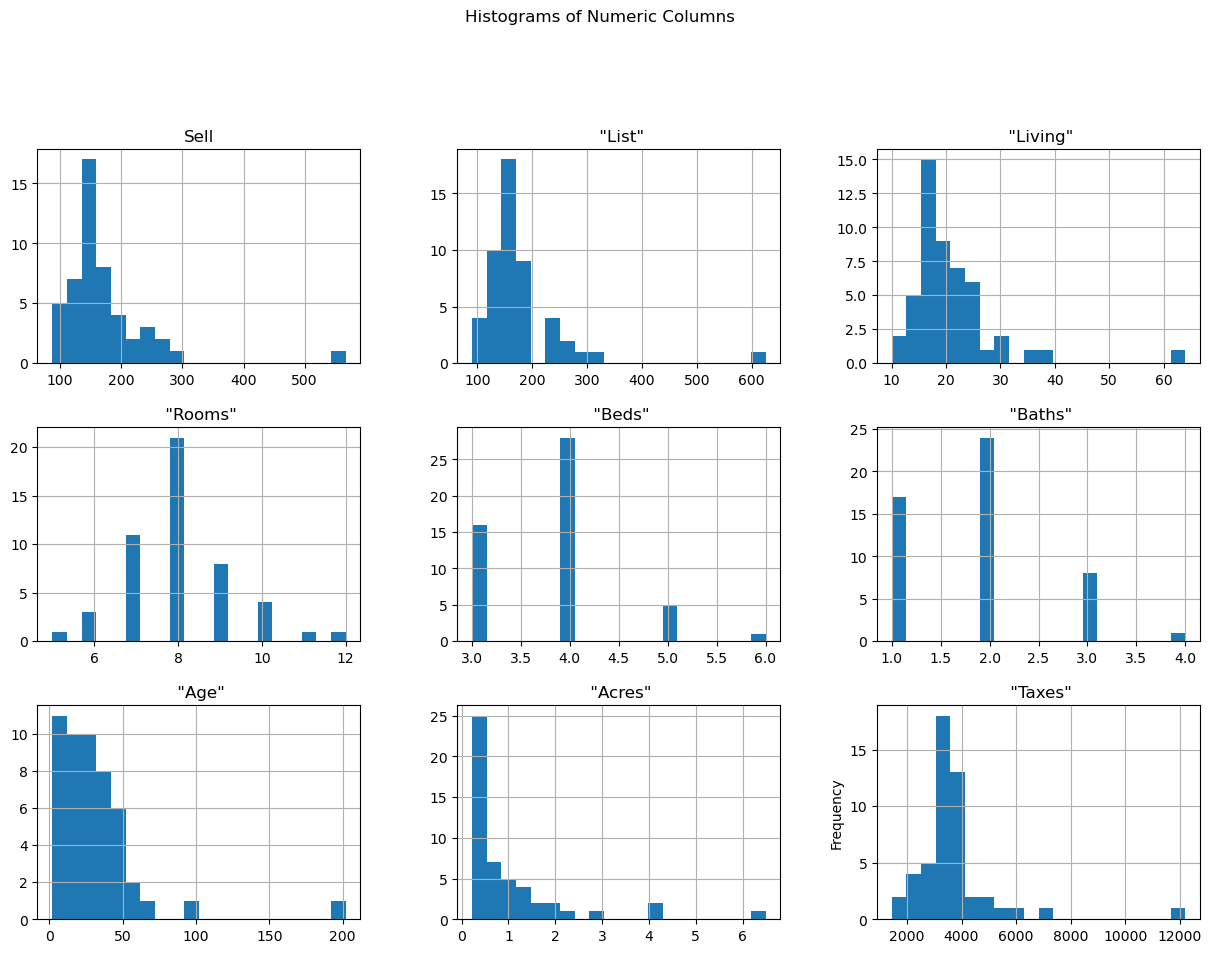

In [10]:
import matplotlib.pyplot as plt

df.hist(bins=20,figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.ylabel("Frequency")
plt.show()

Here we are comparing the number of homes(y) with each of the different categories from our data set using histograms. We can interpret that the majority of homes listed are of smaller dimensions and therefore cheaper. This means there is a direct correlation between the size("Acres", "Living", "Rooms", "Beds") of this homes with the List, Sell, Taxes categories. 

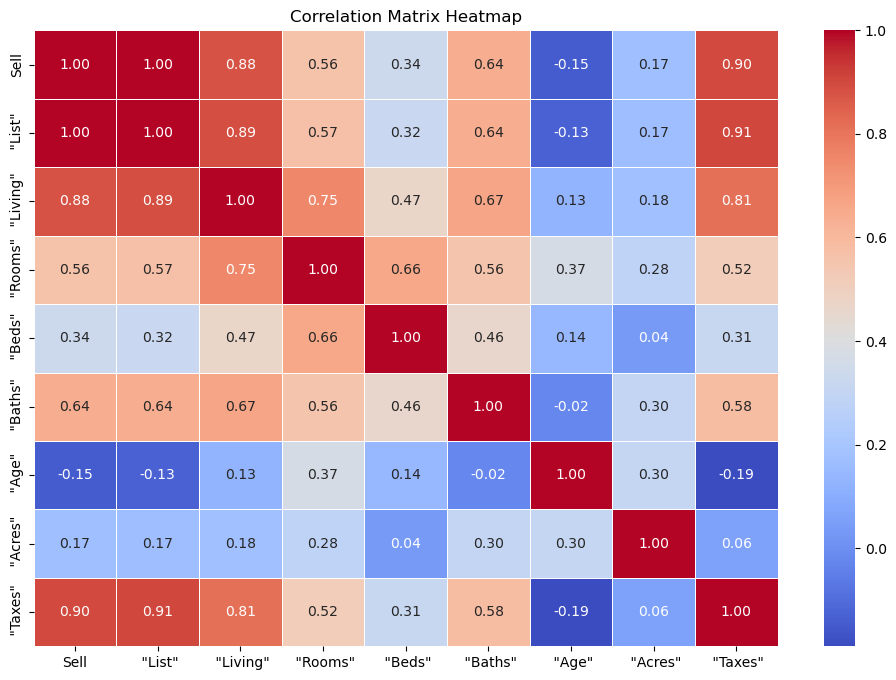

In [11]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

With this correlation HeatMap, there is even more evidnece about the correlations I mentioned before from analyzing the histograms. This also helps to identify which variables are better to use in order to run linear regression models to predict prices. 

In [15]:
print(df.columns)

Index(['Sell', ' "List"', ' "Living"', ' "Rooms"', ' "Beds"', ' "Baths"',
       ' "Age"', ' "Acres"', ' "Taxes"'],
      dtype='object')


In [16]:
c_0 = 'Sell'
c_1 = ' "List"'
c_2 = ' "Living"'
c_3 = ' "Rooms"'
c_4 = ' "Beds"'
c_5 = ' "Baths"'
c_6 = ' "Age"'
c_7 = ' "Acres"'
c_8 = ' "Taxes"'

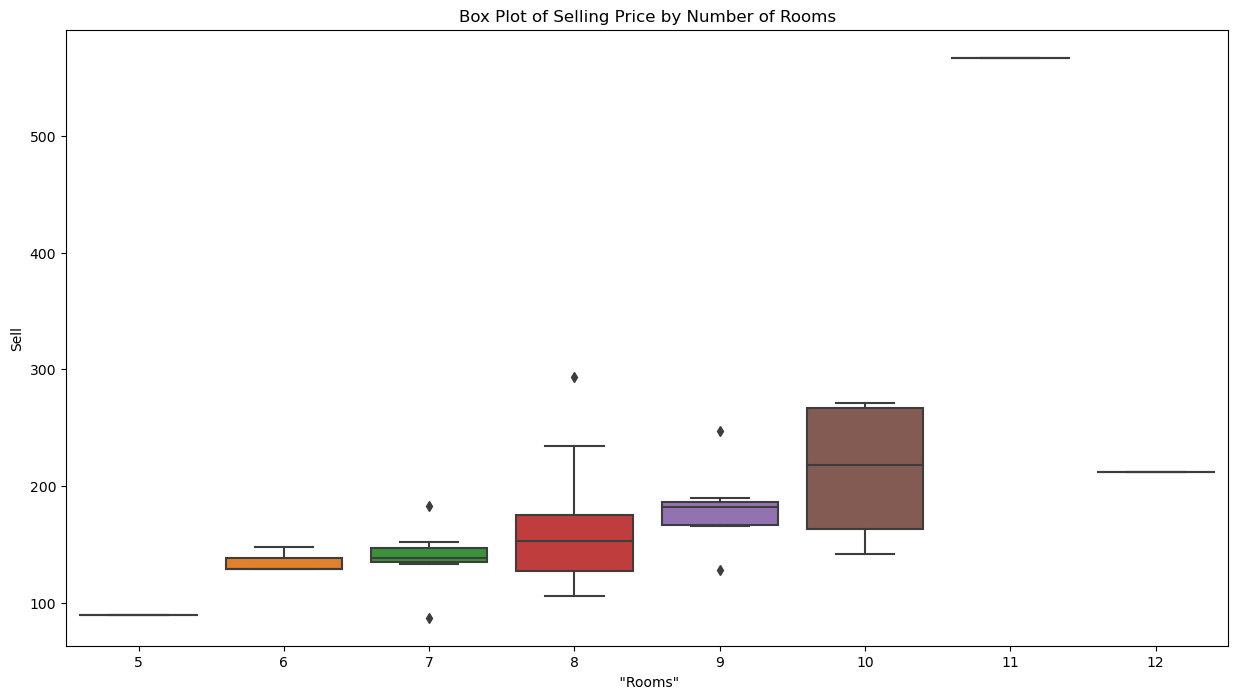

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=c_3, y=c_0, data=df)
plt.title("Box Plot of Selling Price by Number of Rooms")
plt.show()

Lastly, this boxplot shows how homes with larger number of rooms are ususally the ones with a  highing selling price. 

In [25]:
import statsmodels.api as sm

X = sm.add_constant(df[' "Taxes"'])
y = df['Sell']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        15:25:36   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

Taxes appear to be a significant predictor of selling prices based on the linear regression model. The R-squared value suggests that the model explains a substantial portion of the variability in selling prices. The low p-value for the "Taxes" coefficient indicates that the relationship is statistically significant.

However, it's crucial to consider practical significance and the context of the problem. While statistically significant, the coefficient for "Taxes" is relatively small (0.0414). Therefore, while taxes are a good predictor, other factors not included in the model may also influence selling prices, so there should be a further analysis to provide a more comprehensive understanding. 

In [31]:
x2 = sm.add_constant(df[' "Living"'])
y2 = df['Sell']
model_2 = sm.OLS(y2, x2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.39e-17
Time:                        15:54:07   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

The model with "Taxes" as the independent variable appears to be better:

It has a higher R-squared value (0.809) compared to the model with "Living" as the independent variable (0.773).
The F-statistic for the "Taxes" model (203.1) is higher than that for the "Living" model (163.7).
The adjusted R-squared value for the "Taxes" model (0.805) is also higher than that for the "Living" model (0.769).

We are assuming a linear relationship between the independent variable ("Taxes" or "Living") and the dependent variable ("Sell"). If the actual relationship is nonlinear, the model may provide inaccurate predictions and misinterpret the true nature of the association.

The models may suffer from omitted variable bias if important predictors influencing selling prices are not included in the analysis. Failure to account for relevant variables can lead to biased coefficient estimates and may overlook critical factors influencing the dependent variable, limiting the model's explanatory power.